**Exercícios Rotulação de Componentes Conexos**
exercícios obtidos em http://homepages.inf.ed.ac.uk/rbf/HIPR2/label.htm


1. Implemente o algoritmo de rotulação de componentes conexos (algoritmo do slide ou por outra solução) e aplique sobre a imagem binária art8.png. Indique qual vizinhança será considerada (4 ou 8)
Mostre os resultados na forma da imagem art8lab1.png e art8lab2.png

art8.png: 
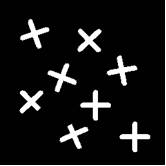
art8lab1.png: 
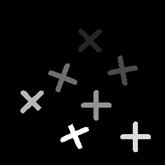
art8lab2.png: 
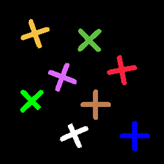
		

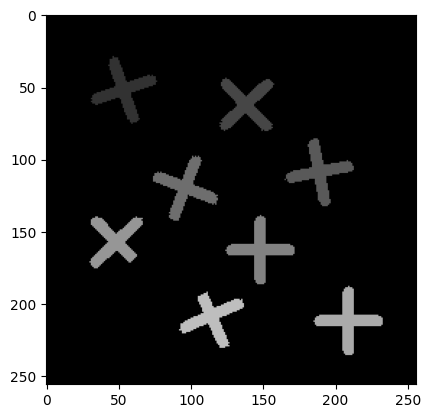

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Carrega a imagem em escala de cinza
img = cv2.imread('art8.png', cv2.IMREAD_GRAYSCALE)

# Cria a imagem de saída com as dimensões da imagem de entrada
out = np.zeros_like(img)

# Define o valor do rótulo inicial
label = 50

# Define a lista de pontos para busca dos vizinhos
lista_proximos = []

# Define vizinhaça
viz = 8

# Percorre a imagem em busca de pixels foreground
for i in range(1, img.shape[0]-1):
    for j in range(1, img.shape[1]-1):
        # Verifica se o pixel atual é foreground e ainda não foi rotulado
        if img[i,j] == 255 and out[i,j] == 0:
            # Atribui o rótulo à posição atual
            out[i,j] = label
            
            # Inclui na lista de busca dos vizinhos
            lista_proximos.append((i, j))
            
            # Percorre a lista de busca enquanto não estiver vazia
            while lista_proximos:
                # Busca o próximo ponto da lista
                p_atual = lista_proximos.pop(0)
                
                # Verifica a vizinhança 8 do ponto atual
                if viz == 8:
                    for k in range(-1, 2):
                        for l in range(-1, 2):
                            # Verifica se o pixel atual é foreground e ainda não foi rotulado
                            if img[p_atual[0]+k, p_atual[1]+l] == 255 and out[p_atual[0]+k, p_atual[1]+l] == 0:
                                # Atribui o rótulo à posição atual
                                out[p_atual[0]+k, p_atual[1]+l] = label
                                
                                # Adiciona o ponto na lista para verificar vizinhos posteriormente
                                lista_proximos.append((p_atual[0]+k, p_atual[1]+l))
                
                # Verifica a vizinhança 4 do ponto atual
                else:
                    for k, l in ((-1, 0), (1, 0), (0, -1), (0, 1)):
                        # Verifica se o pixel atual é foreground e ainda não foi rotulado
                        if img[p_atual[0]+k, p_atual[1]+l] == 255 and out[p_atual[0]+k, p_atual[1]+l] == 0:
                            # Atribui o rótulo à posição atual
                            out[p_atual[0]+k, p_atual[1]+l] = label
                            # Adiciona o ponto na lista para verificar vizinhos posteriormente
                            lista_proximos.append((p_atual[0]+k, p_atual[1]+l))
            # Incrementa o rótulo para o próximo componente conexo
            label += 20   
            
# Salva a imagem de saída
cv2.imwrite('art8lab1.png', out)
plt.imshow(out, cmap='gray', vmin=0, vmax=255)
plt.show()

2. Calcule o número de objetos da imagem clc3.png. Note que antes será necessário binarizar a imagem. Para isso, considere um limiar (*threshold*) de 67, isto é, valores acima de 67 na imagem original recebem zero, e os abaixo recebem 1 (o que resulta na imagem clc3thr1.png).

clc3.png
![clc3.png](clc3.png)
clc3thr1
![clc3thr1.png](clc3thr1.png)
clc3lab1
![clc3lab1.png](clc3lab1.png)

In [3]:
import cv2
import numpy as np

# Carrega a imagem em escala de cinza
img = cv2.imread('clc3.png', 0)

# Binariza a imagem com threshold = 150
ret, thresh = cv2.threshold(img, 150, 255, cv2.THRESH_BINARY)

# Inverte a imagem binarizada
thresh_inv = 255 - thresh 

# Cria uma imagem preta com as mesmas dimensões da imagem invertida
labels = np.zeros_like(thresh_inv)

# Define as labels iniciais
current_label = 1

# Percorre a imagem e aplica o algoritmo de rotulagem
for i in range(thresh_inv.shape[0]):
    for j in range(thresh_inv.shape[1]):
        # Se o pixel for branco e ainda não tiver sido rotulado
        if thresh_inv[i][j] == 255 and labels[i][j] == 0:
            # Rotula o objeto
            neighbors = []
            for x in range(-1, 2):
                for y in range(-1, 2):
                    if x == 0 and y == 0:
                        continue
                    if i+x < 0 or j+y < 0 or i+x >= thresh_inv.shape[0] or j+y >= thresh_inv.shape[1]:
                        continue
                    if labels[i+x][j+y] > 0:
                        neighbors.append(labels[i+x][j+y])
            if len(neighbors) == 0:
                labels[i][j] = current_label
                current_label = current_label % 255 + 1
            else:
                neighbors = np.unique(neighbors)
                min_label = np.min(neighbors)
                labels[i][j] = min_label
                for label in neighbors:
                    if label != min_label:
                        labels[labels == label] = min_label

# Conta o número de objetos
num_objects = np.max(labels)

print(f'O número de objetos na imagem é {num_objects}.')

O número de objetos na imagem é 166.
